##### DATA SET DESCRIPTION :


This dataset contains an airline passenger satisfaction survey.


* Gender: Gender of the passengers (Female, Male)

* Customer Type: The customer type (Loyal customer, disloyal customer)

* Age: The actual age of the passengers

* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* Flight distance: The flight distance of this journey

* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

* Ease of Online booking: Satisfaction level of online booking

* Gate location: Satisfaction level of Gate location

* Food and drink: Satisfaction level of Food and drink

* Online boarding: Satisfaction level of online boarding

* Seat comfort: Satisfaction level of Seat comfort

*  Inflight entertainment: Satisfaction level of inflight entertainment

* On-board service: Satisfaction level of On-board service

* Leg room service: Satisfaction level of Leg room service

* Baggage handling: Satisfaction level of baggage handling

* Check-in service: Satisfaction level of Check-in service

* Inflight service: Satisfaction level of inflight service

* Cleanliness: Satisfaction level of Cleanliness

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = 10

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\K\Downloads\Great Learning\ML\USL\Modal paper\train.csv")
df.drop(columns=['Unnamed: 0','id','satisfaction'],inplace=True)

In [3]:
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  

In [4]:
df.describe().T

count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
...                                     ...          ...         ...   ...   
Checkin service                    103904.0     3.304290    1.265396   0.0   
Inflight service                   103904.0     3.640428    1.175663   0.0   
Cleanliness                        103904.0     3.286351    1.312273   0.0   
Departure Delay in Minutes         103904.0    14.815618   38.230901   0.0   
Arrival Delay in Minutes           103594.0    15.178678   38.698682   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  843.0  1743.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
...                                  ...    ...     ...     ...  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1584.0  

[18 rows x 8 columns]

In [5]:
for col in df.select_dtypes(exclude=np.number).columns:
    print(col)
    print(df[col].value_counts(normalize=True,dropna=False)*100,'\n')


Gender
Female    50.745881
Male      49.254119
Name: Gender, dtype: float64 

Customer Type
Loyal Customer       81.732176
disloyal Customer    18.267824
Name: Customer Type, dtype: float64 

Type of Travel
Business travel    68.962696
Personal Travel    31.037304
Name: Type of Travel, dtype: float64 

Class
Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: Class, dtype: float64 



In [6]:
(df.isnull().sum()/df.shape[0])*100

Gender                        0.000000
Customer Type                 0.000000
Age                           0.000000
Type of Travel                0.000000
Class                         0.000000
                                ...   
Checkin service               0.000000
Inflight service              0.000000
Cleanliness                   0.000000
Departure Delay in Minutes    0.000000
Arrival Delay in Minutes      0.298352
Length: 22, dtype: float64

In [7]:
df.dropna(subset = ['Arrival Delay in Minutes'],inplace=True)

In [8]:
(df.isnull().sum()/df.shape[0])*100

Gender                        0.0
Customer Type                 0.0
Age                           0.0
Type of Travel                0.0
Class                         0.0
                             ... 
Checkin service               0.0
Inflight service              0.0
Cleanliness                   0.0
Departure Delay in Minutes    0.0
Arrival Delay in Minutes      0.0
Length: 22, dtype: float64

In [9]:
df.corr()

Age  Flight Distance  \
Age                                1.000000         0.099838   
Flight Distance                    0.099838         1.000000   
Inflight wifi service              0.017470         0.007050   
Departure/Arrival time convenient  0.038038        -0.019908   
Ease of Online booking             0.024461         0.065697   
...                                     ...              ...   
Checkin service                    0.035003         0.073224   
Inflight service                  -0.049899         0.057430   
Cleanliness                        0.053493         0.093121   
Departure Delay in Minutes        -0.010150         0.001906   
Arrival Delay in Minutes          -0.012147        -0.002426   

                                   Inflight wifi service  \
Age                                             0.017470   
Flight Distance                                 0.007050   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.343758   
Ease of Online booking                          0.715848   
...                                                  ...   
Checkin service                                 0.043178   
Inflight service                                0.110626   
Cleanliness                                     0.132652   
Departure Delay in Minutes                     -0.017451   
Arrival Delay in Minutes                       -0.019095   

                                   Departure/Arrival time convenient  \
Age                                                         0.038038   
Flight Distance                                            -0.019908   
Inflight wifi service                                       0.343758   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.437021   
...                                                              ...   
Checkin service                                             0.093329   
Inflight service                                            0.073227   
Cleanliness                                                 0.014337   
Departure Delay in Minutes                                  0.000791   
Arrival Delay in Minutes                                   -0.000864   

                                   Ease of Online booking  Gate location  \
Age                                              0.024461      -0.001558   
Flight Distance                                  0.065697       0.004732   
Inflight wifi service                            0.715848       0.336127   
Departure/Arrival time convenient                0.437021       0.444601   
Ease of Online booking                           1.000000       0.458746   
...                                                   ...            ...   
Checkin service                                  0.010957      -0.035451   
Inflight service                                 0.035330       0.001742   
Cleanliness                                      0.016192      -0.004015   
Departure Delay in Minutes                      -0.006292       0.005533   
Arrival Delay in Minutes                        -0.007984       0.005143   

                                   Food and drink  Online boarding  \
Age                                      0.022920         0.208681   
Flight Distance                          0.056957         0.215191   
Inflight wifi service                    0.134603         0.457002   
Departure/Arrival time convenient        0.005189         0.069990   
Ease of Online booking                   0.031940         0.404093   
...                                           ...              ...   
Checkin service                          0.087055         0.204208   
Inflight service                         0.034077         0.074390   
Cleanliness                              0.657648         0.331498   
Departure Delay in Minutes              -0.029983        -0.018515   
Ar

In [10]:
plt.figure.figsize=(30,18)

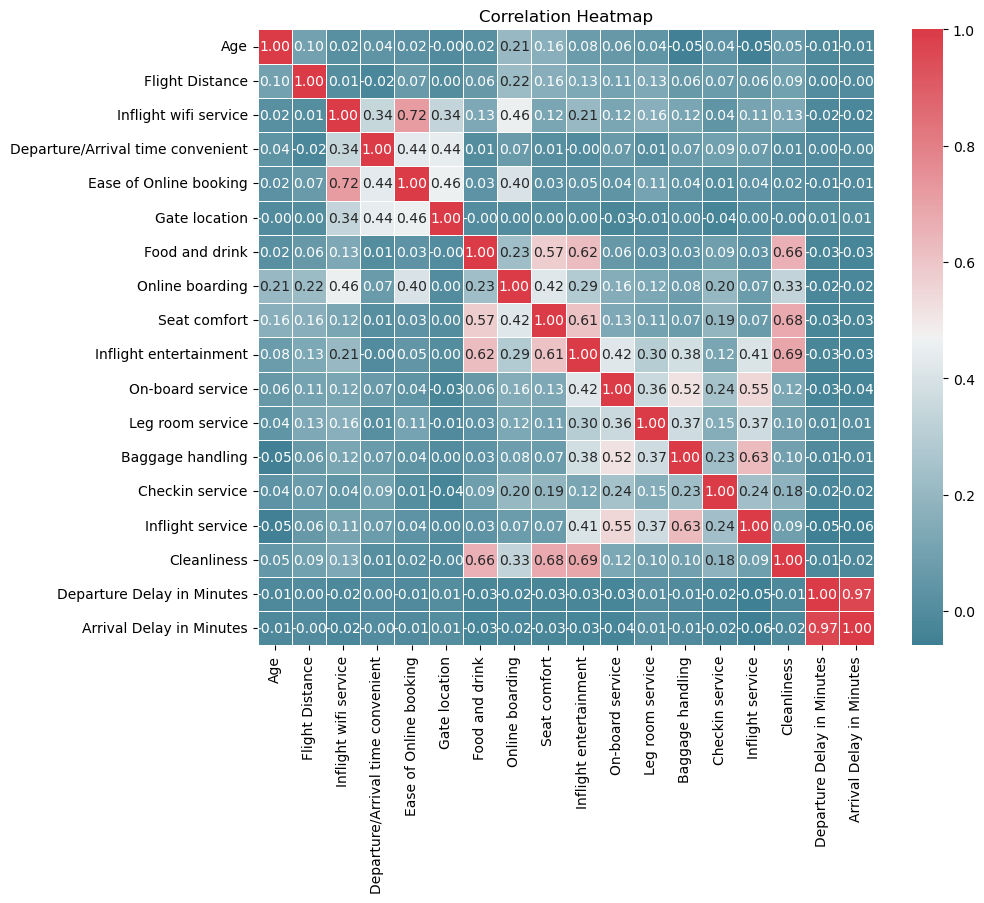

In [11]:
corr_matrix = df.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True)

plt.title("Correlation Heatmap")

plt.show()

In [12]:
numeric_columns = df.select_dtypes(include=[np.number])

cov_matrix = np.cov(numeric_columns, rowvar=False)

In [13]:
pd.DataFrame(cov_matrix)

0              1         2          3          4         5   \
0    228.406556    1504.779961  0.350589   0.876806   0.517170 -0.030084   
1   1504.779961  994601.774592  9.336387 -30.282684  91.657110  6.030465   
2      0.350589       9.336387  1.763229   0.696215   1.329757  0.570288   
3      0.876806     -30.282684  0.696215   2.326335   0.932472  0.866448   
4      0.517170      91.657110  1.329757   0.932472   1.957015  0.819984   
..          ...            ...       ...        ...        ...       ...   
13     0.669403      92.406337  0.072551   0.180127   0.019396 -0.057318   
14    -0.886565      67.332932  0.172693   0.131301   0.058104  0.002616   
15     1.060843     121.862023  0.231135   0.028694   0.029722 -0.006732   
16    -5.847232      72.444795 -0.883242   0.045967  -0.335502  0.269459   
17    -7.104191     -93.621977 -0.981232  -0.051008  -0.432208  0.254296   

           6           7           8           9           10          11  \
0    0.460499    4.255875    3.195236    1.538766    1.112188    0.805092   
1   75.513602  289.600340  207.186796  171.023591  140.737311  175.577729   
2    0.237610    0.818887    0.214741    0.370856    0.207818    0.280316   
3    0.010522    0.144053    0.022964   -0.009521    0.134803    0.025001   
4    0.059401    0.762834    0.055391    0.087991    0.069852    0.197692   
..        ...         ...         ...         ...         ...         ...   
13   0.146446    0.348700    0.319674    0.203787    0.397526    0.254802   
14   0.053258    0.118012    0.107284    0.635069    0.834079    0.570505   
15   1.147222    0.586989    1.174207    1.209979    0.208328    0.166394   
16  -1.519302   -0.952343   -1.373566   -1.406997   -1.545551    0.718811   
17  -1.673244   -1.146185   -1.526088   -1.583851   -1.756230    0.602874   

           12         13         14          15           16           17  
0   -0.849974   0.669403  -0.886565    1.060843    -5.847232    -7.104191  
1   74.467137  92.406337  67.332932  121.862023    72.444795   -93.621977  
2    0.189856   0.072551   0.172693    0.231135    -0.883242    -0.981232  
3    0.129520   0.180127   0.131301    0.028694     0.045967    -0.051008  
4    0.064191   0.019396   0.058104    0.029722    -0.335502    -0.432208  
..        ...        ...        ...         ...          ...          ...  
13   0.348705   1.601227   0.352942    0.297936    -0.871338    -0.997471  
14   0.873256   0.352942   1.382042    0.137126    -2.439986    -2.693073  
15   0.148441   0.297936   0.137126    1.721853    -0.691973    -0.800992  
16  -0.255841  -0.871338  -2.439986   -0.691973  1452.885641  1424.149485  
17  -0.390398  -0.997471  -2.693073   -0.800992  1424.149485  1497.587990  

[18 rows x 18 columns]

The covariance matrix, often denoted as Σ (Sigma), provides information about the covariances between pairs of variables in a dataset. It is a square matrix where each element (i, j) represents the covariance between the i-th and j-th variables. The diagonal elements of the covariance matrix represent the variances of individual variables.

While covariance is a useful statistical concept, it has some limitations. One significant limitation is that it is not standardized, so it doesn't provide a readily interpretable measure of the strength of the relationship. For this reason, the correlation coefficient is often used in conjunction with covariance to provide a standardized measure of linear relationship between variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

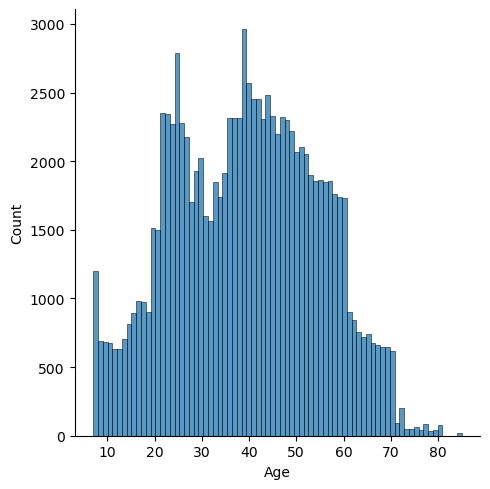

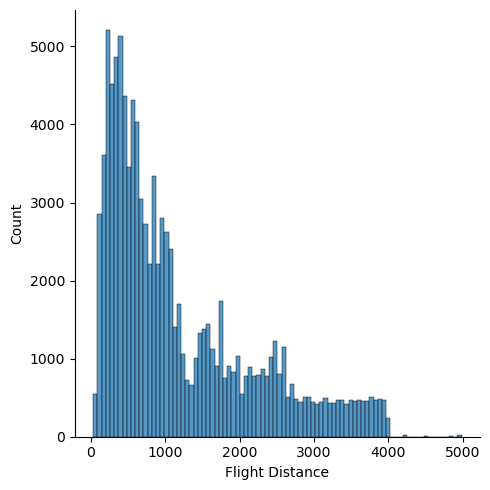

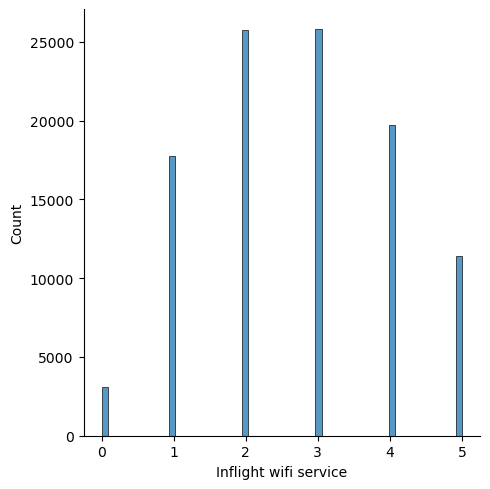

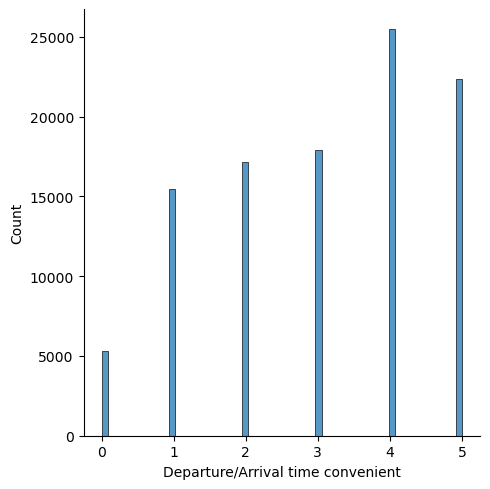

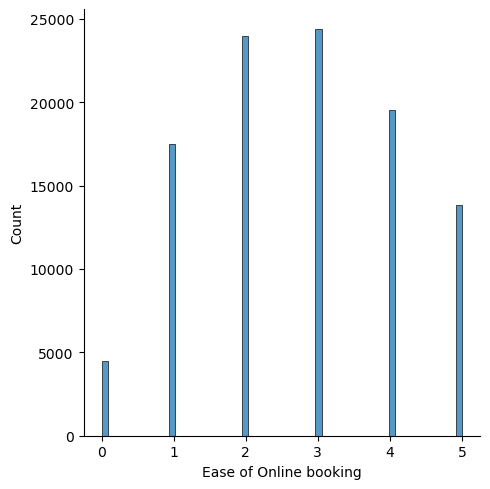

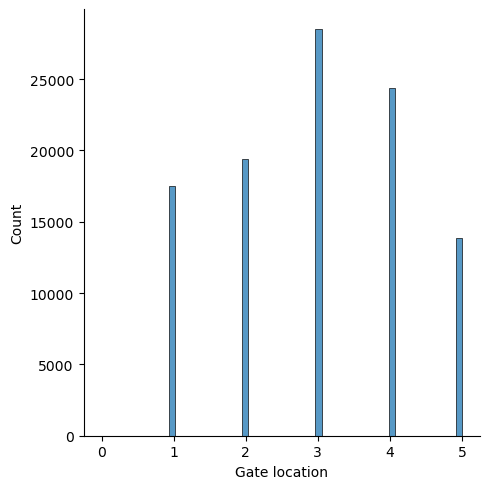

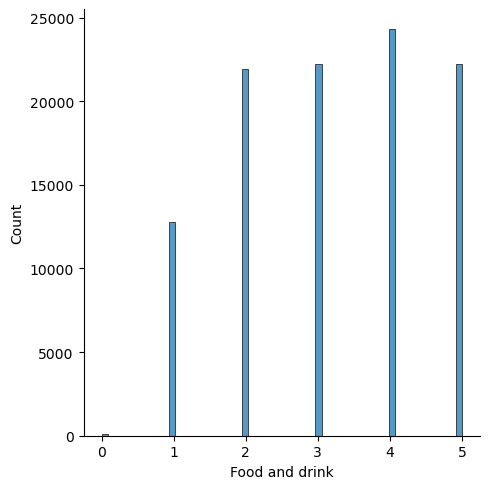

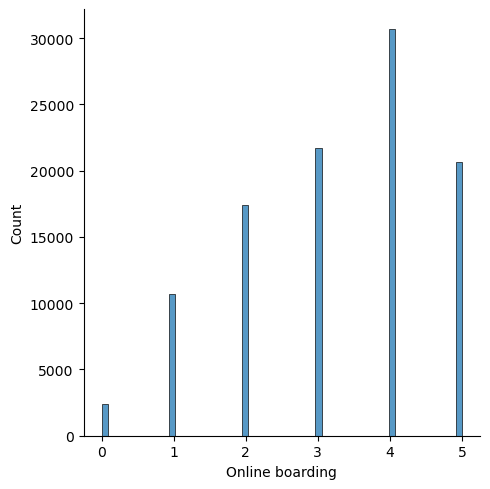

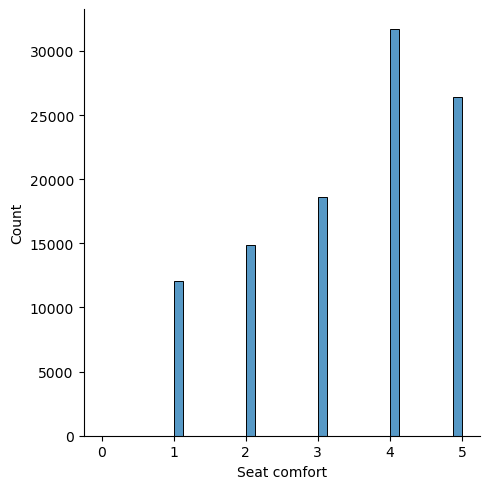

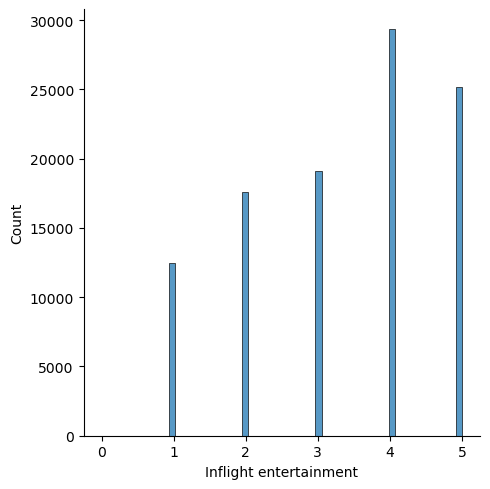

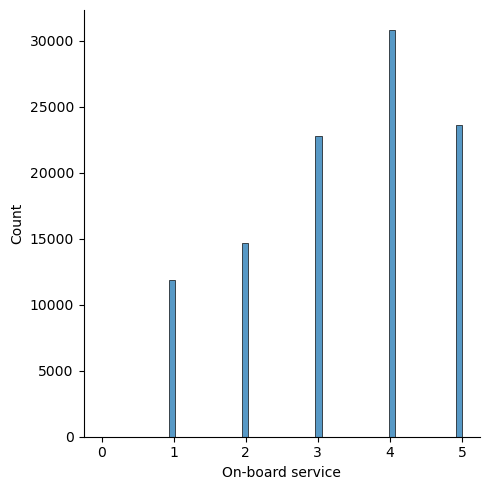

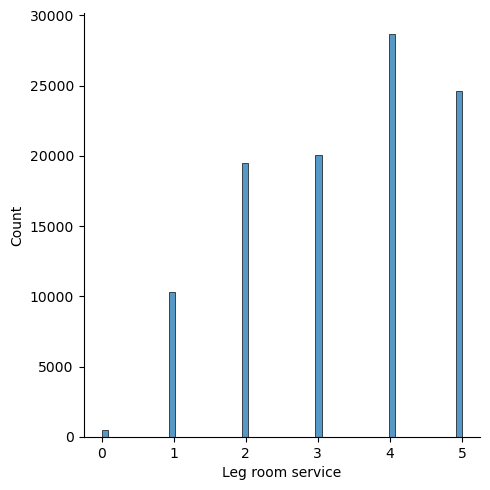

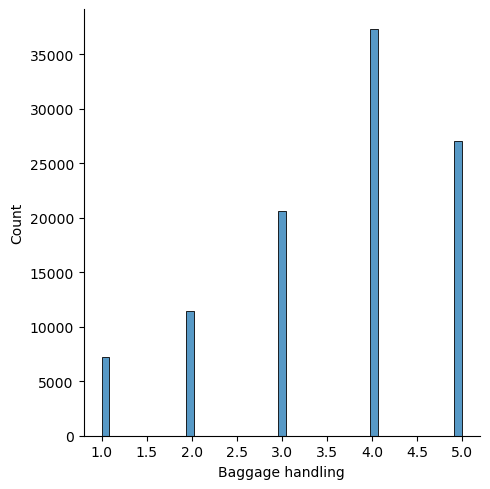

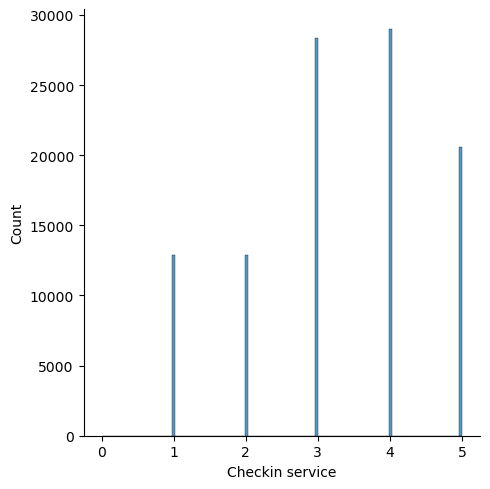

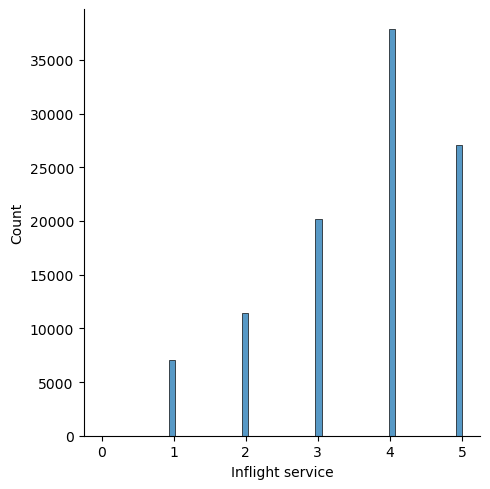

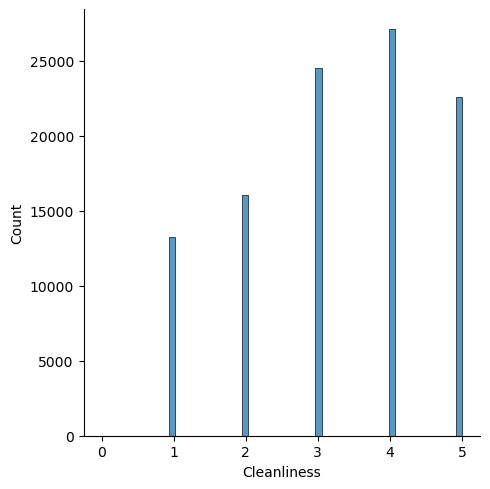

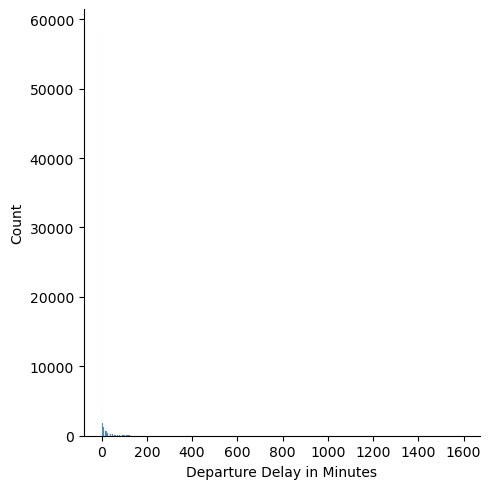

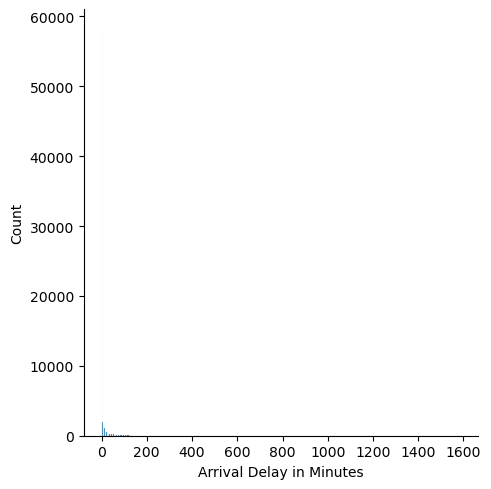

In [14]:
for col in df.select_dtypes(include=np.number).columns:
    sns.displot(df[col])

In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

In [16]:
df.select_dtypes(include=np.number).columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [17]:
num_data=df.select_dtypes(include=np.number)
num_columns = num_data.columns.to_list()

In [18]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
scaled_data = pd.DataFrame(scaled_data,columns=num_columns)

In [19]:
scaled_data

Age  Flight Distance  Inflight wifi service  \
0      -1.745542        -0.731305               0.203521   
1      -0.951526        -0.956916               0.203521   
2      -0.885358        -0.047454              -0.549571   
3      -0.951526        -0.629028              -0.549571   
4       1.430521        -0.977973               0.203521   
...          ...              ...                    ...   
103589 -1.083862        -1.000033              -0.549571   
103590  0.636505         1.160818               0.956612   
103591 -0.620686         0.807862              -1.302662   
103592 -1.150030        -0.189839              -1.302662   
103593 -0.819190         0.535124              -1.302662   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                0.616249                0.173716   
1                               -0.695032                0.173716   
2                               -0.695032               -0.541118   
3                                1.271890                1.603383   
4                               -0.039391                0.173716   
...                                   ...                     ...   
103589                          -1.350673               -0.541118   
103590                           0.616249                0.888550   
103591                          -1.350673               -1.255951   
103592                          -1.350673               -1.255951   
103593                          -0.039391                0.173716   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0           -1.547312        1.352401        -0.185632      1.182991   
1            0.017981       -1.656487        -0.185632     -1.849863   
2           -0.764666        1.352401         1.296479      1.182991   
3            1.583273       -0.904265        -0.926688     -1.091649   
4            0.017981        0.600179         1.296479      1.182991   
...               ...             ...              ...           ...   
103589       0.017981       -0.904265        -0.926688     -1.091649   
103590       0.800627       -0.904265         0.555423      1.182991   
103591       0.017981        0.600179        -1.667744      1.182991   
103592       1.583273       -1.656487        -1.667744     -1.849863   
103593       0.017981       -1.656487        -1.667744     -1.849863   

        Inflight entertainment  On-board service  Leg room service  \
0                     1.231530          0.479237         -0.267143   
1                    -1.769166         -1.849452          1.253304   
2                     1.231530          0.479237         -0.267143   
3                    -1.018992         -1.073222          1.253304   
4                    -0.268818         -0.296993          0.493081   
...                        ...               ...               ...   
103589               -1.018992         -0.296993         -1.787590   
103590                1.231530          1.255467          1.253304   
103591                0.481356         -0.296993         -1.027367   
103592               -1.769166          0.479237          1.253304   
103593               -1.769166         -1.849452         -1.787590   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0               0.311853         0.549773          1.156211     1.305913   
1              -0.534854        -1.821038          0.305580    -1.742432   
2               0.311853         0.549773          0.305580     1.305913   
3              -0.534854        -1.821038          0.305580    -0.980345   
4               0.311853        -0.240497         -0.545051    -0.218259   
...                  ...              ...               ...          ...   
103589          0.311853        -1.030767         -0.545051    -0.980345   
103590          1.158561         1.340043          1.156211     0.543827   
103591          0.311853         1.340043          1.156211     0.543827 

In [20]:
cat_data=df.select_dtypes(exclude=np.number)
cat_columns = cat_data.columns.to_list()

In [21]:
cat_data

Gender      Customer Type   Type of Travel     Class
0         Male     Loyal Customer  Personal Travel  Eco Plus
1         Male  disloyal Customer  Business travel  Business
2       Female     Loyal Customer  Business travel  Business
3       Female     Loyal Customer  Business travel  Business
4         Male     Loyal Customer  Business travel  Business
...        ...                ...              ...       ...
103899  Female  disloyal Customer  Business travel       Eco
103900    Male     Loyal Customer  Business travel  Business
103901    Male  disloyal Customer  Business travel  Business
103902  Female  disloyal Customer  Business travel       Eco
103903    Male     Loyal Customer  Business travel  Business

[103594 rows x 4 columns]

In [22]:
oridinale = OrdinalEncoder()
ordinal_data = oridinale.fit_transform(cat_data)
ordinal_data = pd.DataFrame(ordinal_data,columns=cat_columns)

In [23]:
ordinal_data.value_counts()

Gender  Customer Type  Type of Travel  Class
1.0     0.0            0.0             0.0      20055
0.0     0.0            0.0             0.0      19998
                       1.0             1.0      13177
1.0     0.0            1.0             1.0      13066
0.0     1.0            0.0             1.0       5798
                                                ...  
                       1.0             1.0         77
1.0     1.0            1.0             1.0         71
0.0     1.0            1.0             0.0          7
1.0     1.0            1.0             0.0          4
                                       2.0          4
Length: 23, dtype: int64

In [25]:
final_df =  pd.concat([ordinal_data,scaled_data],axis=1)

In [26]:
final_df

Gender  Customer Type  Type of Travel  Class       Age  \
0          1.0            0.0             1.0    2.0 -1.745542   
1          1.0            1.0             0.0    0.0 -0.951526   
2          0.0            0.0             0.0    0.0 -0.885358   
3          0.0            0.0             0.0    0.0 -0.951526   
4          1.0            0.0             0.0    0.0  1.430521   
...        ...            ...             ...    ...       ...   
103589     0.0            1.0             0.0    1.0 -1.083862   
103590     1.0            0.0             0.0    0.0  0.636505   
103591     1.0            1.0             0.0    0.0 -0.620686   
103592     0.0            1.0             0.0    1.0 -1.150030   
103593     1.0            0.0             0.0    0.0 -0.819190   

        Flight Distance  Inflight wifi service  \
0             -0.731305               0.203521   
1             -0.956916               0.203521   
2             -0.047454              -0.549571   
3             -0.629028              -0.549571   
4             -0.977973               0.203521   
...                 ...                    ...   
103589        -1.000033              -0.549571   
103590         1.160818               0.956612   
103591         0.807862              -1.302662   
103592        -0.189839              -1.302662   
103593         0.535124              -1.302662   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                0.616249                0.173716   
1                               -0.695032                0.173716   
2                               -0.695032               -0.541118   
3                                1.271890                1.603383   
4                               -0.039391                0.173716   
...                                   ...                     ...   
103589                          -1.350673               -0.541118   
103590                           0.616249                0.888550   
103591                          -1.350673               -1.255951   
103592                          -1.350673               -1.255951   
103593                          -0.039391                0.173716   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0           -1.547312        1.352401        -0.185632      1.182991   
1            0.017981       -1.656487        -0.185632     -1.849863   
2           -0.764666        1.352401         1.296479      1.182991   
3            1.583273       -0.904265        -0.926688     -1.091649   
4            0.017981        0.600179         1.296479      1.182991   
...               ...             ...              ...           ...   
103589       0.017981       -0.904265        -0.926688     -1.091649   
103590       0.800627       -0.904265         0.555423      1.182991   
103591       0.017981        0.600179        -1.667744      1.182991   
103592       1.583273       -1.656487        -1.667744     -1.849863   
103593       0.017981       -1.656487        -1.667744     -1.849863   

        Inflight entertainment  On-board service  Leg room service  \
0                     1.231530          0.479237         -0.267143   
1                    -1.769166         -1.849452          1.253304   
2                     1.231530          0.479237         -0.267143   
3                    -1.018992         -1.073222          1.253304   
4                    -0.268818         -0.296993          0.493081   
...                        ...               ...               ...   
103589               -1.018992         -0.296993         -1.787590   
103590                1.231530          1.255467          1.253304   
103591                0.481356         -0.296993         -1.027367   
103592               -1.769166          0.479237          1.253304   
103593               -1.769166         -1.849452         -1.787590   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0  

In [26]:
final_df.isnull().sum().sum()

0

## KMeans

In [54]:
err = []
for i in  range(2,11):
    model_km = KMeans(n_clusters=i,random_state=1)
    model_km.fit_transform(final_df)
    predict=model_km.labels_
    print(f'silhouette_score for {i}_cluster is',round(silhouette_score(final_df,predict),2))
    err.append(model_km.inertia_)

silhouette_score for 2_cluster is 0.15
silhouette_score for 3_cluster is 0.11
silhouette_score for 4_cluster is 0.12
silhouette_score for 5_cluster is 0.12
silhouette_score for 6_cluster is 0.12
silhouette_score for 7_cluster is 0.11
silhouette_score for 8_cluster is 0.11
silhouette_score for 9_cluster is 0.11
silhouette_score for 10_cluster is 0.11


Text(0.5, 1.0, 'KMeans')

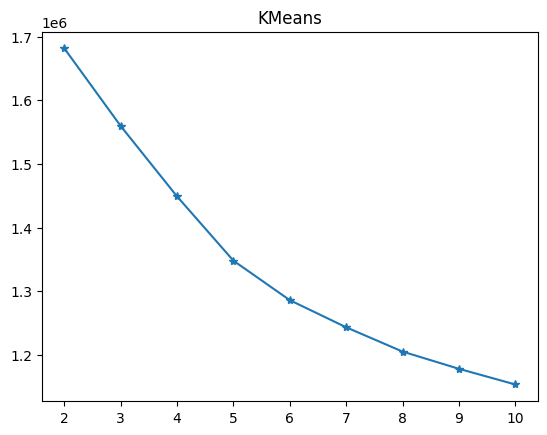

In [56]:
plt.plot(range(2,11),err,marker='*')
plt.title('KMeans')


In [49]:
model_km = KMeans(n_clusters=2,random_state=1)
model_km.fit_transform(final_df)
predict=model_km.labels_


In [50]:
kmean_df = final_df.copy()
kmean_df['target'] = model_km.labels_

## DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-base clustering method. This method can be used to create non-linear clusters. The method considers the high-density regions as clusters. This method is effective in identifying the noise/ outliers in the data.

In [28]:
distance_matrix = euclidean_distances(final_df)[np.triu_indices(103594,k=1)]

MemoryError: Unable to allocate 80.0 GiB for an array with shape (103594, 103594) and data type float64

In [1]:
print('Minimum Distance :',min(distance_matrix))

print('Maximum Distance :',max(distance_matrix))

NameError: ignored

In [29]:
dbscan_model = DBSCAN(eps = 1.4, min_samples = 4)

# fit the model on the scaled data
dbscan_model.fit(final_df)

DBSCAN(eps=1.4, min_samples=4)

In [30]:
(set(dbscan_model.labels_))

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

In [31]:
dbscan_df = final_df.copy()

dbscan_df['DBSCSAN_label'] = dbscan_model.labels_

# print head() of the dataframe
dbscan_df.head()

Gender  Customer Type  Type of Travel  Class       Age  Flight Distance  \
0     1.0            0.0             1.0    2.0 -1.745542        -0.731305   
1     1.0            1.0             0.0    0.0 -0.951526        -0.956916   
2     0.0            0.0             0.0    0.0 -0.885358        -0.047454   
3     0.0            0.0             0.0    0.0 -0.951526        -0.629028   
4     1.0            0.0             0.0    0.0  1.430521        -0.977973   

   Inflight wifi service  Departure/Arrival time convenient  \
0               0.203521                           0.616249   
1               0.203521                          -0.695032   
2              -0.549571                          -0.695032   
3              -0.549571                           1.271890   
4               0.203521                          -0.039391   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                0.173716      -1.547312        1.352401        -0.185632   
1                0.173716       0.017981       -1.656487        -0.185632   
2               -0.541118      -0.764666        1.352401         1.296479   
3                1.603383       1.583273       -0.904265        -0.926688   
4                0.173716       0.017981        0.600179         1.296479   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0      1.182991                1.231530          0.479237         -0.267143   
1     -1.849863               -1.769166         -1.849452          1.253304   
2      1.182991                1.231530          0.479237         -0.267143   
3     -1.091649               -1.018992         -1.073222          1.253304   
4      1.182991               -0.268818         -0.296993          0.493081   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0          0.311853         0.549773          1.156211     1.305913   
1         -0.534854        -1.821038          0.305580    -1.742432   
2          0.311853         0.549773          0.305580     1.305913   
3         -0.534854        -1.821038          0.305580    -0.980345   
4          0.311853        -0.240497         -0.545051    -0.218259   

   Departure Delay in Minutes  Arrival Delay in Minutes  DBSCSAN_label  
0                    0.268966                  0.072905             -1  
1                   -0.360682                 -0.237184             -1  
2                   -0.386917                 -0.392229              0  
3                   -0.098328                 -0.159662             -1  
4                   -0.386917                 -0.392229             -1

## Heirarchy Clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [63]:
K = [2, 3, 4, 5, 6]

silhouette_scores = [] 

for i in K:
        
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled))) 
    
plt.bar(K, silhouette_scores) 


plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

plt.show()

NameError: name 'features_scaled' is not defined

In [37]:
hierar_clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

hierar_clusters.fit(final_df)

MemoryError: Unable to allocate 40.0 GiB for an array with shape (5365806621,) and data type float64

In [36]:
heirarchy_df = final_df.copy()

heirarchy_df['Hierar_label'] = hierar_clusters.labels_


AttributeError: 'AgglomerativeClustering' object has no attribute 'labels_'

# PCA


In [40]:
from sklearn.decomposition import PCA


In [28]:
pca_model = PCA(n_components=0.99)
pca_model.fit(final_df)

PCA(n_components=0.99)

In [29]:
eigen_value = pca_model.explained_variance_
print('Top 5 eigen_value are', eigen_value[0:6])

Top 5 eigen_value are [3.90973598 2.36482505 2.18318099 1.9629189  1.33201094 0.99146368]


In [30]:
eigen_vector = pca_model.components_
print('Top 5 eigen_vectors are \n', eigen_vector[0:6])

Top 5 eigen_vectors are 
 [[-3.01770830e-03  3.00794809e-02  4.52115249e-02  1.05402972e-01
  -7.42075826e-02 -1.29599165e-01 -2.26380553e-01 -9.31234453e-02
  -1.60945017e-01 -6.15731562e-02 -2.97143136e-01 -2.89179171e-01
  -3.43641453e-01 -4.17742374e-01 -2.73648342e-01 -2.21188387e-01
  -2.52781537e-01 -1.80709684e-01 -2.56428112e-01 -3.46995309e-01
   3.72083242e-02  3.98784380e-02]
 [ 5.21689092e-05  9.68449119e-03 -7.02736413e-03 -2.55762080e-02
  -1.05103725e-02  2.34981439e-02 -4.51568016e-01 -4.19950169e-01
  -5.36868515e-01 -4.31084264e-01  1.51310261e-01 -1.52524974e-01
   1.48228431e-01  1.73088020e-01  7.21394029e-02  1.61519305e-02
   5.90346319e-02  4.89997315e-02  6.66786268e-02  1.69674390e-01
  -2.77400724e-02 -2.75863333e-02]
 [-1.46985055e-02 -2.67609308e-02 -1.51956247e-02  2.68599519e-02
   1.03388900e-01  9.50353347e-03  3.99643012e-02 -2.87782200e-02
   4.07379814e-02  2.94846114e-02  3.41103498e-01  1.68321724e-01
   3.15864065e-01  6.81291240e-02 -3.76820588e

In [31]:
pca_model.explained_variance_ratio_

array([0.20578871, 0.12447242, 0.11491159, 0.10331811, 0.07011031,
       0.05218563, 0.04941382, 0.04802386, 0.03643549, 0.03008774,
       0.02528431, 0.02373005, 0.01931847, 0.01757046, 0.01562983,
       0.01531946, 0.01299555, 0.01227739, 0.00986111, 0.00770295])

In [32]:
np.cumsum(pca_model.explained_variance_ratio_)*100

array([20.57887073, 33.02611249, 44.5172719 , 54.84908319, 61.8601144 ,
       67.07867722, 72.02005909, 76.82244483, 80.46599373, 83.47476725,
       86.0031981 , 88.37620266, 90.3080493 , 92.06509511, 93.62807821,
       95.16002466, 96.45957981, 97.68731846, 98.67342958, 99.4437241 ])

In [33]:
top_5_pc = np.cumsum(pca_model.explained_variance_ratio_)*100
print('Top 5 PCA contribution percentenage are', top_5_pc[4])

Top 5 PCA contribution percentenage are 61.86011440199866


In [41]:

pca_model = PCA(n_components=0.95,random_state=1)
pca_data = pca_model.fit_transform(final_df)


In [35]:
np.cumsum(pca_model.explained_variance_ratio_)*100

array([20.57887073, 33.02611249, 44.5172719 , 54.84908319, 61.8601144 ,
       67.07867722, 72.02005909, 76.82244483, 80.46599373, 83.47476725,
       86.0031981 , 88.37620266, 90.3080493 , 92.06509511, 93.62807821,
       95.16002466])

In [36]:
pca_data.shape

(103594, 16)

In [42]:
pc_list = ['pc_'+str(i) for i in range(1,17)]

In [43]:
pca_df = pd.DataFrame(pca_data,columns=pc_list)

In [44]:
pca_df

pc_1      pc_2      pc_3      pc_4      pc_5      pc_6      pc_7  \
0      -1.895586  1.167941  0.276179  0.298548 -2.424508 -0.118440 -1.267788   
1       3.247817 -1.183668 -1.319796 -0.518986  0.273955 -2.220110 -0.417647   
2      -2.195012  1.918474  0.936021 -0.426762 -0.273407 -0.427129 -0.832482   
3       1.791948 -2.468983 -0.875448 -0.265635 -0.863936 -1.152383  1.464467   
4      -0.859717 -0.235530  0.928355 -0.553411  0.815936  0.475478 -0.518055   
...          ...       ...       ...       ...       ...       ...       ...   
103589  2.975479  0.486339 -0.457689 -0.656320 -0.936659 -0.945394 -0.471979   
103590 -3.231510 -0.873962 -1.506233 -0.296243  1.029590  0.546872  0.462129   
103591 -0.300619  2.698559 -0.079547 -0.085936 -0.627746  0.460720  0.651744   
103592  3.448320  0.313042 -2.159941 -0.590950  0.110655  0.196397  0.160017   
103593  3.964178 -0.463493 -1.006484 -0.730029  0.444270  0.346512  0.270749   

            pc_8      pc_9     pc_10     pc_11     pc_12     pc_13     pc_14  \
0      -0.564306  0.483962  1.633811 -0.101795  0.237677  0.614681  0.559901   
1       0.725357 -1.228959 -0.335953 -0.993075 -0.723390  0.794460 -0.685396   
2      -0.695374  0.542162 -0.072105  0.226780 -0.533632 -0.025504 -0.676285   
3       0.138918 -1.269471  0.073070 -0.278112 -0.957522  0.695776 -1.087237   
4       1.432617 -0.460618 -0.379023 -0.415388 -0.751050 -0.565781 -0.983868   
...          ...       ...       ...       ...       ...       ...       ...   
103589  0.046121  1.313667 -1.144333  0.063323 -0.167295 -0.650387  0.080298   
103590 -0.412807 -0.376976 -0.389216  0.081551 -0.427159  0.043582  1.073955   
103591 -1.842693  0.422491 -1.523574 -0.530405  0.472015  0.642347  0.445536   
103592 -1.425342 -2.120764 -1.759791  2.017350  0.202492  1.471304 -0.021283   
103593 -1.891556  0.690873 -0.575550 -1.349846  0.414086 -0.370061 -0.097377   

           pc_15     pc_16  
0       0.298010  0.311329  
1       0.032211 -0.536427  
2      -0.194709 -0.096903  
3       0.415729 -0.834187  
4       0.569774  0.222200  
...          ...       ...  
103589  0.075863 -0.018507  
103590  0.415800 -0.247333  
103591  1.067903 -0.067792  
103592 -0.656234  0.550717  
103593  0.617327 -0.858072  

[103594 rows x 16 columns]

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
for i in  range(2,11):
    model_km = KMeans(n_clusters=i,random_state=1)
    model_km.fit_transform(pca_df)
    predict=model_km.labels_
    print(f'silhouette_score for {i}_cluster is',round(silhouette_score(pca_df,predict),2))

silhouette_score for 2_cluster is 0.15
silhouette_score for 3_cluster is 0.12
silhouette_score for 4_cluster is 0.13
silhouette_score for 5_cluster is 0.13
silhouette_score for 6_cluster is 0.13
silhouette_score for 7_cluster is 0.12
silhouette_score for 8_cluster is 0.12
silhouette_score for 9_cluster is 0.11
silhouette_score for 10_cluster is 0.12


In [42]:
err=[]
for i in  range(2,11):
    model_km = KMeans(n_clusters=i,random_state=1)
    model_km.fit_transform(pca_df)
    err.append(model_km.inertia_)

In [ ]:
err

[18459.159804901556,
 17015.360759797644,
 15685.520084465948,
 14574.950234258667,
 13938.154388611909,
 13443.112115913143,
 13019.70102297381,
 12692.57060904731,
 12425.604613457886]

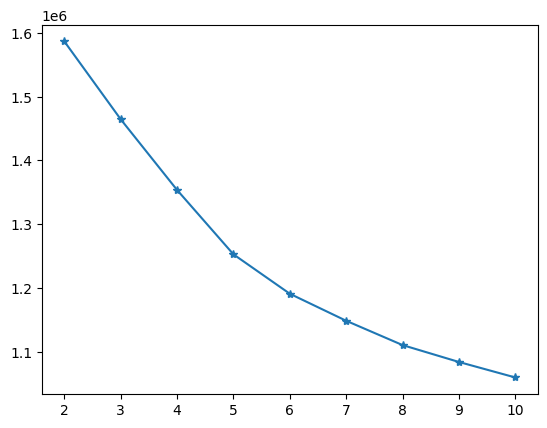

In [43]:
plt.plot(range(2,11),err,marker='*')

In [53]:
model_km = KMeans(n_clusters=2,random_state=1)
trained_model = model_km.fit_transform(pca_df)

In [54]:
model_km.labels_

array([1, 0, 1, ..., 1, 0, 0])

In [55]:
label_df = final_df.copy()
label_df['target'] = model_km.labels_

In [56]:
label_df

Gender  Customer Type  Type of Travel  Class       Age  \
0          1.0            0.0             1.0    2.0 -1.745542   
1          1.0            1.0             0.0    0.0 -0.951526   
2          0.0            0.0             0.0    0.0 -0.885358   
3          0.0            0.0             0.0    0.0 -0.951526   
4          1.0            0.0             0.0    0.0  1.430521   
...        ...            ...             ...    ...       ...   
103589     0.0            1.0             0.0    1.0 -1.083862   
103590     1.0            0.0             0.0    0.0  0.636505   
103591     1.0            1.0             0.0    0.0 -0.620686   
103592     0.0            1.0             0.0    1.0 -1.150030   
103593     1.0            0.0             0.0    0.0 -0.819190   

        Flight Distance  Inflight wifi service  \
0             -0.731305               0.203521   
1             -0.956916               0.203521   
2             -0.047454              -0.549571   
3             -0.629028              -0.549571   
4             -0.977973               0.203521   
...                 ...                    ...   
103589        -1.000033              -0.549571   
103590         1.160818               0.956612   
103591         0.807862              -1.302662   
103592        -0.189839              -1.302662   
103593         0.535124              -1.302662   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                0.616249                0.173716   
1                               -0.695032                0.173716   
2                               -0.695032               -0.541118   
3                                1.271890                1.603383   
4                               -0.039391                0.173716   
...                                   ...                     ...   
103589                          -1.350673               -0.541118   
103590                           0.616249                0.888550   
103591                          -1.350673               -1.255951   
103592                          -1.350673               -1.255951   
103593                          -0.039391                0.173716   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0           -1.547312        1.352401        -0.185632      1.182991   
1            0.017981       -1.656487        -0.185632     -1.849863   
2           -0.764666        1.352401         1.296479      1.182991   
3            1.583273       -0.904265        -0.926688     -1.091649   
4            0.017981        0.600179         1.296479      1.182991   
...               ...             ...              ...           ...   
103589       0.017981       -0.904265        -0.926688     -1.091649   
103590       0.800627       -0.904265         0.555423      1.182991   
103591       0.017981        0.600179        -1.667744      1.182991   
103592       1.583273       -1.656487        -1.667744     -1.849863   
103593       0.017981       -1.656487        -1.667744     -1.849863   

        Inflight entertainment  On-board service  Leg room service  \
0                     1.231530          0.479237         -0.267143   
1                    -1.769166         -1.849452          1.253304   
2                     1.231530          0.479237         -0.267143   
3                    -1.018992         -1.073222          1.253304   
4                    -0.268818         -0.296993          0.493081   
...                        ...               ...               ...   
103589               -1.018992         -0.296993         -1.787590   
103590                1.231530          1.255467          1.253304   
103591                0.481356         -0.296993         -1.027367   
103592               -1.769166          0.479237          1.253304   
103593               -1.769166         -1.849452         -1.787590   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0  

In [ ]:
model_pca.cluster_centers_

array([[ 1.99573467e-02, -1.71475613e-02, -5.33249492e-04,
        -1.48805259e-02,  7.56929454e-02,  4.76588453e-02,
        -1.27478130e-01,  3.79661311e-02, -6.52111560e-02,
        -8.00140171e-04,  4.70812446e-02, -4.19942799e-02,
        -1.77289661e-02, -7.14619157e-04, -9.32715723e-02,
        -1.02490058e-01, -5.90067681e-02, -6.18534519e-02,
         8.51115298e-02,  2.18938797e-03,  8.35542596e-02,
         8.62365610e-02],
       [-1.29875227e-01,  6.45705723e-02,  1.49351316e-02,
         1.50286474e-01, -1.04000423e-01, -2.03358603e-01,
        -6.53564388e-02, -1.88278106e-01,  1.10277218e-04,
         3.02229022e-01,  1.89899438e-01, -1.29458108e-01,
         1.27715022e-01,  4.18838749e-02, -7.50599093e-03,
        -9.65835703e-02,  8.77595329e-02,  1.00925142e-02,
         8.62187679e-02, -1.02974631e-01, -7.20567103e-03,
        -9.47247974e-03],
       [-8.89394164e-02,  1.64181095e-01, -2.53989295e-01,
        -4.41153561e-01,  8.70753964e-03, -1.07902077e-01,
    

In [ ]:
pd.DataFrame(model_pca.cluster_centers_)

0         1         2         3         4         5         6   \
0  0.019957 -0.017148 -0.000533 -0.014881  0.075693  0.047659 -0.127478   
1 -0.129875  0.064571  0.014935  0.150286 -0.104000 -0.203359 -0.065356   
2 -0.088939  0.164181 -0.253989 -0.441154  0.008708 -0.107902 -0.040803   

         7         8         9         10        11        12        13  \
0  0.037966 -0.065211 -0.000800  0.047081 -0.041994 -0.017729 -0.000715   
1 -0.188278  0.000110  0.302229  0.189899 -0.129458  0.127715  0.041884   
2  0.109723  0.384337 -0.315418 -0.055186 -0.406432  0.434897 -0.005239   

         14        15        16        17        18        19        20  \
0 -0.093272 -0.102490 -0.059007 -0.061853  0.085112  0.002189  0.083554   
1 -0.007506 -0.096584  0.087760  0.010093  0.086219 -0.102975 -0.007206   
2  0.006350 -0.150520  0.075946 -0.019577 -0.005964 -0.216888 -0.002182   

         21  
0  0.086237  
1 -0.009472  
2  0.007590

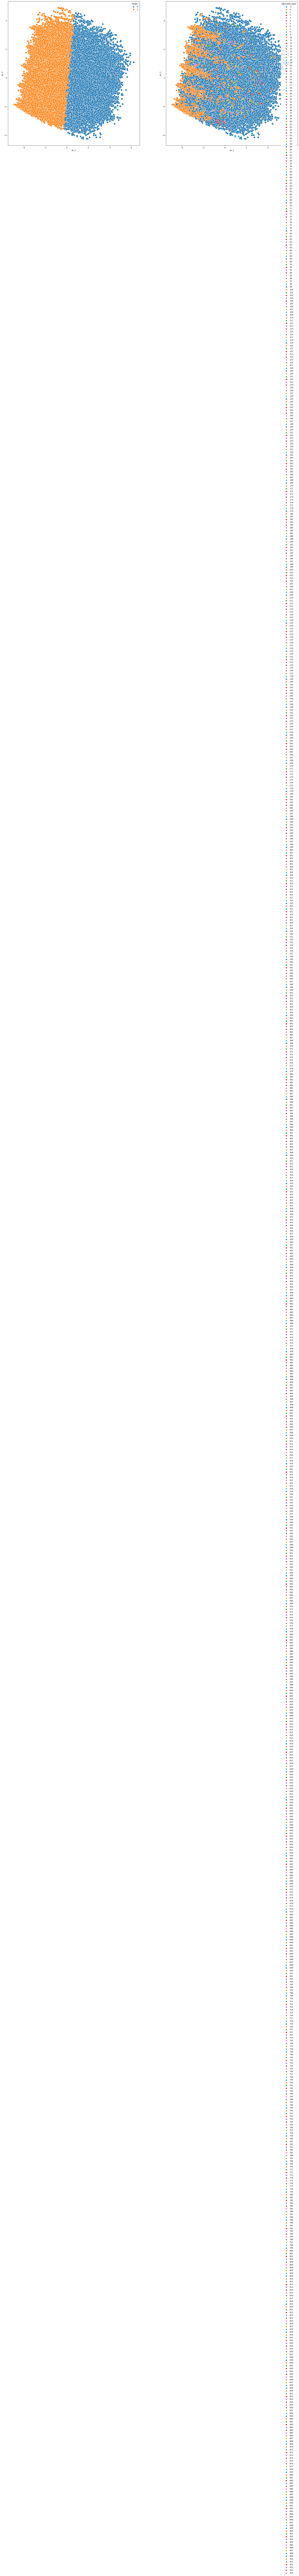

In [51]:

plt.figure(figsize = (28, 14))

plt.subplot(1,2,1)
sns.scatterplot(x = 'pc_1', y = 'pc_2', data = pca_df,  s = 90, hue = kmean_df['target'], palette = 'tab10')

plt.subplot(1,2,2)
sns.scatterplot(x = 'pc_1', y = 'pc_2', data = pca_df,  s = 90, hue = dbscan_df['DBSCSAN_label'], palette = 'tab10')

plt.show()